# Digit Recognizer

----

Author - Sushma G.

---

### Project Description

Competition Description
MNIST ("Modified National Institute of Standards and Technology") is the de facto “hello world” dataset of computer vision. Since its release in 1999, this classic dataset of handwritten images has served as the basis for benchmarking classification algorithms. As new machine learning techniques emerge, MNIST remains a reliable resource for researchers and learners alike.

In this project, our goal is to correctly identify digits from a dataset of tens of thousands of handwritten images. 

### Importing the required libraries

In [1]:
%matplotlib inline

import numpy as np
from sklearn import datasets, svm, metrics
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, recall_score, accuracy_score,precision_score, f1_score, roc_curve, auc, make_scorer,roc_auc_score 
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from scipy import stats
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import AdaBoostClassifier
# import warnings filter
from warnings import simplefilter
simplefilter(action='ignore', category=DeprecationWarning)


# Display all columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


pd.options.display.float_format = '{:.5f}'.format
RANDOM_STATE = 42
scoring = {'acc': 'accuracy'}

pca = PCA(n_components=0.95)
kfold = StratifiedKFold(n_splits=5, shuffle = True)


from collections import Counter
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve

sns.set(style='white', context='notebook', palette='deep')

C:\Users\shiva\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Here are some definitions of them not all and refrences for these packages.

   - [**Numpy**](https://numpy.org/) : is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices.
   - [**Pandas**](https://pandas.pydata.org/) :  is a software library written for the Python programming language for data manipulation and analysis. 
   - [**Matplotlib**](https://matplotlib.org/) : Python library for plotting graphs, that is data visualization.
   - [**Pyplot**](https://matplotlib.org/api/pyplot_api.html) : is a Matplotlib module which provides a MATLAB-like interface.
   - [**Sklearn**](https://scikit-learn.org/stable/index.html) : is a Matplotlib module which provides a machine Learning Algorithms.   
   - [**TensorFlow**](https://www.tensorflow.org/) : Deep Learning framework created by Google Brain.
   - [**Keras**](https://keras.io/) : is an open-source neural-network library written in Python. It is capable of running on top of TensorFlow
   
If you want to learn more about CNNs, there a great material [here](https://www.youtube.com/watch?v=ArPaAX_PhIs&list=PLkDaE6sCZn6Gl29AoE31iwdVwSG-KnDzF).   

**Dataset description:**
<div class="alert-warning">
The data files train.csv and test.csv contain gray-scale images of hand-drawn digits, from zero        through nine. Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255, inclusive.
    
The training data set, (train.csv), has 785 columns. The first column, called "label", is the digit that was drawn by the user. The rest of the columns contain the pixel-values of the associated image.    
The test data set, (test.csv), is the same as the training set, except that it does not contain the "label" column.        
</div><br><br>    

### Loading the data

In [2]:
sample_submission = pd.read_csv("data/sample_submission.csv")
test = pd.read_csv("data/test.csv")
train = pd.read_csv("data/train.csv")

X_train = train.loc[:,"pixel0":"pixel783"]
Y_train = train.loc[:, "label"]
X_test = test

In the train file, the first column is the label (`0..9, output`).
You can change .iloc[:, `this`] to see more columns. Each column has a max value of 255 and a min value of 0. That is each pixel has values between 0..255. 

<center>
<img src="https://seis.bristol.ac.uk/~ggjlb/teaching/ccrs_tutorial/tutorial/graphics/content/pixel.gif"></img></center>

In [3]:
print('Shape of Training Data : ', X_train.shape)
X_train.head()

Shape of Training Data :  (42000, 784)


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,pixel41,pixel42,pixel43,pixel44,pixel45,pixel46,pixel47,pixel48,pixel49,pixel50,pixel51,pixel52,pixel53,pixel54,pixel55,pixel56,pixel57,pixel58,pixel59,pixel60,pixel61,pixel62,pixel63,pixel64,pixel65,pixel66,pixel67,pixel68,pixel69,pixel70,pixel71,pixel72,pixel73,pixel74,pixel75,pixel76,pixel77,pixel78,pixel79,pixel80,pixel81,pixel82,pixel83,pixel84,pixel85,pixel86,pixel87,pixel88,pixel89,pixel90,pixel91,pixel92,pixel93,pixel94,pixel95,pixel96,pixel97,pixel98,pixel99,pixel100,pixel101,pixel102,pixel103,pixel104,pixel105,pixel106,pixel107,pixel108,pixel109,pixel110,pixel111,pixel112,pixel113,pixel114,pixel115,pixel116,pixel117,pixel118,pixel119,pixel120,pixel121,pixel122,pixel123,pixel124,pixel125,pixel126,pixel127,pixel128,pixel129,pixel130,pixel131,pixel132,pixel133,pixel134,pixel135,pixel136,pixel137,pixel138,pixel139,pixel140,pixel141,pixel142,pixel143,pixel144,pixel145,pixel146,pixel147,pixel148,pixel149,pixel150,pixel151,pixel152,pixel153,pixel154,pixel155,pixel156,pixel157,pixel158,pixel159,pixel160,pixel161,pixel162,pixel163,pixel164,pixel165,pixel166,pixel167,pixel168,pixel169,pixel170,pixel171,pixel172,pixel173,pixel174,pixel175,pixel176,pixel177,pixel178,pixel179,pixel180,pixel181,pixel182,pixel183,pixel184,pixel185,pixel186,pixel187,pixel188,pixel189,pixel190,pixel191,pixel192,pixel193,pixel194,pixel195,pixel196,pixel197,pixel198,pixel199,pixel200,pixel201,pixel202,pixel203,pixel204,pixel205,pixel206,pixel207,pixel208,pixel209,pixel210,pixel211,pixel212,pixel213,pixel214,pixel215,pixel216,pixel217,pixel218,pixel219,pixel220,pixel221,pixel222,pixel223,pixel224,pixel225,pixel226,pixel227,pixel228,pixel229,pixel230,pixel231,pixel232,pixel233,pixel234,pixel235,pixel236,pixel237,pixel238,pixel239,pixel240,pixel241,pixel242,pixel243,pixel244,pixel245,pixel246,pixel247,pixel248,pixel249,pixel250,pixel251,pixel252,pixel253,pixel254,pixel255,pixel256,pixel257,pixel258,pixel259,pixel260,pixel261,pixel262,pixel263,pixel264,pixel265,pixel266,pixel267,pixel268,pixel269,pixel270,pixel271,pixel272,pixel273,pixel274,pixel275,pixel276,pixel277,pixel278,pixel279,pixel280,pixel281,pixel282,pixel283,pixel284,pixel285,pixel286,pixel287,pixel288,pixel289,pixel290,pixel291,pixel292,pixel293,pixel294,pixel295,pixel296,pixel297,pixel298,pixel299,pixel300,pixel301,pixel302,pixel303,pixel304,pixel305,pixel306,pixel307,pixel308,pixel309,pixel310,pixel311,pixel312,pixel313,pixel314,pixel315,pixel316,pixel317,pixel318,pixel319,pixel320,pixel321,pixel322,pixel323,pixel324,pixel325,pixel326,pixel327,pixel328,pixel329,pixel330,pixel331,pixel332,pixel333,pixel334,pixel335,pixel336,pixel337,pixel338,pixel339,pixel340,pixel341,pixel342,pixel343,pixel344,pixel345,pixel346,pixel347,pixel348,pixel349,pixel350,pixel351,pixel352,pixel353,pixel354,pixel355,pixel356,pixel357,pixel358,pixel359,pixel360,pixel361,pixel362,pixel363,pixel364,pixel365,pixel366,pixel367,pixel368,pixel369,pixel370,pixel371,pixel372,pixel373,pixel374,pixel375,pixel376,pixel377,pixel378,pixel379,pixel380,pixel381,pixel382,pixel383,pixel384,pixel385,pixel386,pixel387,pixel388,pixel389,pixel390,pixel391,pixel392,pixel393,pixel394,pixel395,pixel396,pixel397,pixel398,pixel399,pixel400,pixel401,pixel402,pixel403,pixel404,pixel405,pixel406,pixel407,pixel408,pixel409,pixel410,pixel411,pixel412,pixel413,pixel414,pixel415,pixel416,pixel417,pixel418,pixel419,pixel420,pixel421,pixel422,pixel423,pixel424,pixel425,pixel426,pixel427,pixel428,pixel429,pixel430,pixel431,pixel432,pixel433,pixel434,pixel435,pixel436,pixel437,pixel438,pixel439,pixel440,pixel441,pixel442,pixel443,pixel444,pixel445,pixel446,pixel447,pixel448,pixel449,pixel450,pixel451,pixel452,pixel453,pixel454,pixel455,pixel

In [4]:
print('Shape of Testing Data : ', X_test.shape)
X_test.head()

Shape of Testing Data :  (28000, 784)


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,pixel41,pixel42,pixel43,pixel44,pixel45,pixel46,pixel47,pixel48,pixel49,pixel50,pixel51,pixel52,pixel53,pixel54,pixel55,pixel56,pixel57,pixel58,pixel59,pixel60,pixel61,pixel62,pixel63,pixel64,pixel65,pixel66,pixel67,pixel68,pixel69,pixel70,pixel71,pixel72,pixel73,pixel74,pixel75,pixel76,pixel77,pixel78,pixel79,pixel80,pixel81,pixel82,pixel83,pixel84,pixel85,pixel86,pixel87,pixel88,pixel89,pixel90,pixel91,pixel92,pixel93,pixel94,pixel95,pixel96,pixel97,pixel98,pixel99,pixel100,pixel101,pixel102,pixel103,pixel104,pixel105,pixel106,pixel107,pixel108,pixel109,pixel110,pixel111,pixel112,pixel113,pixel114,pixel115,pixel116,pixel117,pixel118,pixel119,pixel120,pixel121,pixel122,pixel123,pixel124,pixel125,pixel126,pixel127,pixel128,pixel129,pixel130,pixel131,pixel132,pixel133,pixel134,pixel135,pixel136,pixel137,pixel138,pixel139,pixel140,pixel141,pixel142,pixel143,pixel144,pixel145,pixel146,pixel147,pixel148,pixel149,pixel150,pixel151,pixel152,pixel153,pixel154,pixel155,pixel156,pixel157,pixel158,pixel159,pixel160,pixel161,pixel162,pixel163,pixel164,pixel165,pixel166,pixel167,pixel168,pixel169,pixel170,pixel171,pixel172,pixel173,pixel174,pixel175,pixel176,pixel177,pixel178,pixel179,pixel180,pixel181,pixel182,pixel183,pixel184,pixel185,pixel186,pixel187,pixel188,pixel189,pixel190,pixel191,pixel192,pixel193,pixel194,pixel195,pixel196,pixel197,pixel198,pixel199,pixel200,pixel201,pixel202,pixel203,pixel204,pixel205,pixel206,pixel207,pixel208,pixel209,pixel210,pixel211,pixel212,pixel213,pixel214,pixel215,pixel216,pixel217,pixel218,pixel219,pixel220,pixel221,pixel222,pixel223,pixel224,pixel225,pixel226,pixel227,pixel228,pixel229,pixel230,pixel231,pixel232,pixel233,pixel234,pixel235,pixel236,pixel237,pixel238,pixel239,pixel240,pixel241,pixel242,pixel243,pixel244,pixel245,pixel246,pixel247,pixel248,pixel249,pixel250,pixel251,pixel252,pixel253,pixel254,pixel255,pixel256,pixel257,pixel258,pixel259,pixel260,pixel261,pixel262,pixel263,pixel264,pixel265,pixel266,pixel267,pixel268,pixel269,pixel270,pixel271,pixel272,pixel273,pixel274,pixel275,pixel276,pixel277,pixel278,pixel279,pixel280,pixel281,pixel282,pixel283,pixel284,pixel285,pixel286,pixel287,pixel288,pixel289,pixel290,pixel291,pixel292,pixel293,pixel294,pixel295,pixel296,pixel297,pixel298,pixel299,pixel300,pixel301,pixel302,pixel303,pixel304,pixel305,pixel306,pixel307,pixel308,pixel309,pixel310,pixel311,pixel312,pixel313,pixel314,pixel315,pixel316,pixel317,pixel318,pixel319,pixel320,pixel321,pixel322,pixel323,pixel324,pixel325,pixel326,pixel327,pixel328,pixel329,pixel330,pixel331,pixel332,pixel333,pixel334,pixel335,pixel336,pixel337,pixel338,pixel339,pixel340,pixel341,pixel342,pixel343,pixel344,pixel345,pixel346,pixel347,pixel348,pixel349,pixel350,pixel351,pixel352,pixel353,pixel354,pixel355,pixel356,pixel357,pixel358,pixel359,pixel360,pixel361,pixel362,pixel363,pixel364,pixel365,pixel366,pixel367,pixel368,pixel369,pixel370,pixel371,pixel372,pixel373,pixel374,pixel375,pixel376,pixel377,pixel378,pixel379,pixel380,pixel381,pixel382,pixel383,pixel384,pixel385,pixel386,pixel387,pixel388,pixel389,pixel390,pixel391,pixel392,pixel393,pixel394,pixel395,pixel396,pixel397,pixel398,pixel399,pixel400,pixel401,pixel402,pixel403,pixel404,pixel405,pixel406,pixel407,pixel408,pixel409,pixel410,pixel411,pixel412,pixel413,pixel414,pixel415,pixel416,pixel417,pixel418,pixel419,pixel420,pixel421,pixel422,pixel423,pixel424,pixel425,pixel426,pixel427,pixel428,pixel429,pixel430,pixel431,pixel432,pixel433,pixel434,pixel435,pixel436,pixel437,pixel438,pixel439,pixel440,pixel441,pixel442,pixel443,pixel444,pixel445,pixel446,pixel447,pixel448,pixel449,pixel450,pixel451,pixel452,pixel453,pixel454,pixel455,pixel

In [5]:
X_train.info() # Check the datatypes of the different variables

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 784 entries, pixel0 to pixel783
dtypes: int64(784)
memory usage: 251.2 MB


In [6]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Columns: 784 entries, pixel0 to pixel783
dtypes: int64(784)
memory usage: 167.5 MB


In [7]:
X_train.describe() # Check for basis stats of the various variables

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,pixel41,pixel42,pixel43,pixel44,pixel45,pixel46,pixel47,pixel48,pixel49,pixel50,pixel51,pixel52,pixel53,pixel54,pixel55,pixel56,pixel57,pixel58,pixel59,pixel60,pixel61,pixel62,pixel63,pixel64,pixel65,pixel66,pixel67,pixel68,pixel69,pixel70,pixel71,pixel72,pixel73,pixel74,pixel75,pixel76,pixel77,pixel78,pixel79,pixel80,pixel81,pixel82,pixel83,pixel84,pixel85,pixel86,pixel87,pixel88,pixel89,pixel90,pixel91,pixel92,pixel93,pixel94,pixel95,pixel96,pixel97,pixel98,pixel99,pixel100,pixel101,pixel102,pixel103,pixel104,pixel105,pixel106,pixel107,pixel108,pixel109,pixel110,pixel111,pixel112,pixel113,pixel114,pixel115,pixel116,pixel117,pixel118,pixel119,pixel120,pixel121,pixel122,pixel123,pixel124,pixel125,pixel126,pixel127,pixel128,pixel129,pixel130,pixel131,pixel132,pixel133,pixel134,pixel135,pixel136,pixel137,pixel138,pixel139,pixel140,pixel141,pixel142,pixel143,pixel144,pixel145,pixel146,pixel147,pixel148,pixel149,pixel150,pixel151,pixel152,pixel153,pixel154,pixel155,pixel156,pixel157,pixel158,pixel159,pixel160,pixel161,pixel162,pixel163,pixel164,pixel165,pixel166,pixel167,pixel168,pixel169,pixel170,pixel171,pixel172,pixel173,pixel174,pixel175,pixel176,pixel177,pixel178,pixel179,pixel180,pixel181,pixel182,pixel183,pixel184,pixel185,pixel186,pixel187,pixel188,pixel189,pixel190,pixel191,pixel192,pixel193,pixel194,pixel195,pixel196,pixel197,pixel198,pixel199,pixel200,pixel201,pixel202,pixel203,pixel204,pixel205,pixel206,pixel207,pixel208,pixel209,pixel210,pixel211,pixel212,pixel213,pixel214,pixel215,pixel216,pixel217,pixel218,pixel219,pixel220,pixel221,pixel222,pixel223,pixel224,pixel225,pixel226,pixel227,pixel228,pixel229,pixel230,pixel231,pixel232,pixel233,pixel234,pixel235,pixel236,pixel237,pixel238,pixel239,pixel240,pixel241,pixel242,pixel243,pixel244,pixel245,pixel246,pixel247,pixel248,pixel249,pixel250,pixel251,pixel252,pixel253,pixel254,pixel255,pixel256,pixel257,pixel258,pixel259,pixel260,pixel261,pixel262,pixel263,pixel264,pixel265,pixel266,pixel267,pixel268,pixel269,pixel270,pixel271,pixel272,pixel273,pixel274,pixel275,pixel276,pixel277,pixel278,pixel279,pixel280,pixel281,pixel282,pixel283,pixel284,pixel285,pixel286,pixel287,pixel288,pixel289,pixel290,pixel291,pixel292,pixel293,pixel294,pixel295,pixel296,pixel297,pixel298,pixel299,pixel300,pixel301,pixel302,pixel303,pixel304,pixel305,pixel306,pixel307,pixel308,pixel309,pixel310,pixel311,pixel312,pixel313,pixel314,pixel315,pixel316,pixel317,pixel318,pixel319,pixel320,pixel321,pixel322,pixel323,pixel324,pixel325,pixel326,pixel327,pixel328,pixel329,pixel330,pixel331,pixel332,pixel333,pixel334,pixel335,pixel336,pixel337,pixel338,pixel339,pixel340,pixel341,pixel342,pixel343,pixel344,pixel345,pixel346,pixel347,pixel348,pixel349,pixel350,pixel351,pixel352,pixel353,pixel354,pixel355,pixel356,pixel357,pixel358,pixel359,pixel360,pixel361,pixel362,pixel363,pixel364,pixel365,pixel366,pixel367,pixel368,pixel369,pixel370,pixel371,pixel372,pixel373,pixel374,pixel375,pixel376,pixel377,pixel378,pixel379,pixel380,pixel381,pixel382,pixel383,pixel384,pixel385,pixel386,pixel387,pixel388,pixel389,pixel390,pixel391,pixel392,pixel393,pixel394,pixel395,pixel396,pixel397,pixel398,pixel399,pixel400,pixel401,pixel402,pixel403,pixel404,pixel405,pixel406,pixel407,pixel408,pixel409,pixel410,pixel411,pixel412,pixel413,pixel414,pixel415,pixel416,pixel417,pixel418,pixel419,pixel420,pixel421,pixel422,pixel423,pixel424,pixel425,pixel426,pixel427,pixel428,pixel429,pixel430,pixel431,pixel432,pixel433,pixel434,pixel435,pixel436,pixel437,pixel438,pixel439,pixel440,pixel441,pixel442,pixel443,pixel444,pixel445,pixel446,pixel447,pixel448,pixel449,pixel450,pixel451,pixel452,pixel453,pixel454,pixel455,pixel

In [8]:
X_test.describe()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,pixel41,pixel42,pixel43,pixel44,pixel45,pixel46,pixel47,pixel48,pixel49,pixel50,pixel51,pixel52,pixel53,pixel54,pixel55,pixel56,pixel57,pixel58,pixel59,pixel60,pixel61,pixel62,pixel63,pixel64,pixel65,pixel66,pixel67,pixel68,pixel69,pixel70,pixel71,pixel72,pixel73,pixel74,pixel75,pixel76,pixel77,pixel78,pixel79,pixel80,pixel81,pixel82,pixel83,pixel84,pixel85,pixel86,pixel87,pixel88,pixel89,pixel90,pixel91,pixel92,pixel93,pixel94,pixel95,pixel96,pixel97,pixel98,pixel99,pixel100,pixel101,pixel102,pixel103,pixel104,pixel105,pixel106,pixel107,pixel108,pixel109,pixel110,pixel111,pixel112,pixel113,pixel114,pixel115,pixel116,pixel117,pixel118,pixel119,pixel120,pixel121,pixel122,pixel123,pixel124,pixel125,pixel126,pixel127,pixel128,pixel129,pixel130,pixel131,pixel132,pixel133,pixel134,pixel135,pixel136,pixel137,pixel138,pixel139,pixel140,pixel141,pixel142,pixel143,pixel144,pixel145,pixel146,pixel147,pixel148,pixel149,pixel150,pixel151,pixel152,pixel153,pixel154,pixel155,pixel156,pixel157,pixel158,pixel159,pixel160,pixel161,pixel162,pixel163,pixel164,pixel165,pixel166,pixel167,pixel168,pixel169,pixel170,pixel171,pixel172,pixel173,pixel174,pixel175,pixel176,pixel177,pixel178,pixel179,pixel180,pixel181,pixel182,pixel183,pixel184,pixel185,pixel186,pixel187,pixel188,pixel189,pixel190,pixel191,pixel192,pixel193,pixel194,pixel195,pixel196,pixel197,pixel198,pixel199,pixel200,pixel201,pixel202,pixel203,pixel204,pixel205,pixel206,pixel207,pixel208,pixel209,pixel210,pixel211,pixel212,pixel213,pixel214,pixel215,pixel216,pixel217,pixel218,pixel219,pixel220,pixel221,pixel222,pixel223,pixel224,pixel225,pixel226,pixel227,pixel228,pixel229,pixel230,pixel231,pixel232,pixel233,pixel234,pixel235,pixel236,pixel237,pixel238,pixel239,pixel240,pixel241,pixel242,pixel243,pixel244,pixel245,pixel246,pixel247,pixel248,pixel249,pixel250,pixel251,pixel252,pixel253,pixel254,pixel255,pixel256,pixel257,pixel258,pixel259,pixel260,pixel261,pixel262,pixel263,pixel264,pixel265,pixel266,pixel267,pixel268,pixel269,pixel270,pixel271,pixel272,pixel273,pixel274,pixel275,pixel276,pixel277,pixel278,pixel279,pixel280,pixel281,pixel282,pixel283,pixel284,pixel285,pixel286,pixel287,pixel288,pixel289,pixel290,pixel291,pixel292,pixel293,pixel294,pixel295,pixel296,pixel297,pixel298,pixel299,pixel300,pixel301,pixel302,pixel303,pixel304,pixel305,pixel306,pixel307,pixel308,pixel309,pixel310,pixel311,pixel312,pixel313,pixel314,pixel315,pixel316,pixel317,pixel318,pixel319,pixel320,pixel321,pixel322,pixel323,pixel324,pixel325,pixel326,pixel327,pixel328,pixel329,pixel330,pixel331,pixel332,pixel333,pixel334,pixel335,pixel336,pixel337,pixel338,pixel339,pixel340,pixel341,pixel342,pixel343,pixel344,pixel345,pixel346,pixel347,pixel348,pixel349,pixel350,pixel351,pixel352,pixel353,pixel354,pixel355,pixel356,pixel357,pixel358,pixel359,pixel360,pixel361,pixel362,pixel363,pixel364,pixel365,pixel366,pixel367,pixel368,pixel369,pixel370,pixel371,pixel372,pixel373,pixel374,pixel375,pixel376,pixel377,pixel378,pixel379,pixel380,pixel381,pixel382,pixel383,pixel384,pixel385,pixel386,pixel387,pixel388,pixel389,pixel390,pixel391,pixel392,pixel393,pixel394,pixel395,pixel396,pixel397,pixel398,pixel399,pixel400,pixel401,pixel402,pixel403,pixel404,pixel405,pixel406,pixel407,pixel408,pixel409,pixel410,pixel411,pixel412,pixel413,pixel414,pixel415,pixel416,pixel417,pixel418,pixel419,pixel420,pixel421,pixel422,pixel423,pixel424,pixel425,pixel426,pixel427,pixel428,pixel429,pixel430,pixel431,pixel432,pixel433,pixel434,pixel435,pixel436,pixel437,pixel438,pixel439,pixel440,pixel441,pixel442,pixel443,pixel444,pixel445,pixel446,pixel447,pixel448,pixel449,pixel450,pixel451,pixel452,pixel453,pixel454,pixel455,pixel

### Looking at the classes in the target variable

In [9]:
Y_train.value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

**Setting the plotting configurations/customizations**

In [10]:
plt.style.context('seaborn-talk')
plt.style.use('fivethirtyeight')
params = {'legend.fontsize': '16',
          'figure.figsize': (15, 5),
         'axes.labelsize': '20',
         'axes.titlesize':'30',
         'xtick.labelsize':'18',
         'ytick.labelsize':'18'}
plt.rcParams.update(params)

plt.rcParams['text.color'] = '#A04000'
plt.rcParams['xtick.color'] = '#283747'
plt.rcParams['ytick.color'] = '#808000'
plt.rcParams['axes.labelcolor'] = '#283747'

# Seaborn style (figures)
sns.set(context='notebook', style='whitegrid')
sns.set_style('ticks', {'xtick.direction':'in', 'ytick.direction':'in'})

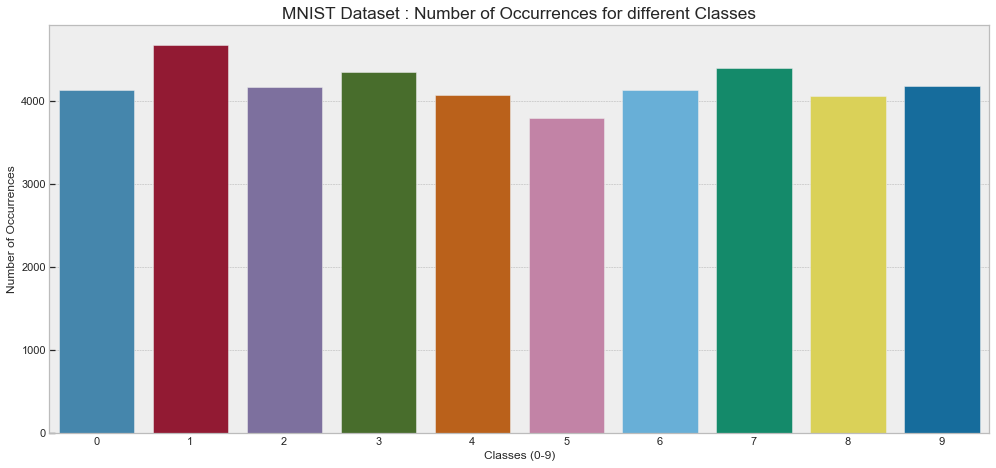

In [11]:
vals = Y_train.value_counts()
plt.style.use('bmh')
plt.figure(figsize=(15,7))
sns.barplot(vals.index, vals.values)
plt.title('MNIST Dataset : Number of Occurrences for different Classes')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Classes (0-9)', fontsize=12)
plt.show()

The data seems to be balanced.

## Our Modelling Approach

<img src = 'https://scikit-learn.org/stable/_images/grid_search_workflow.png'>

## Simple modeling
#### Cross validate models

I compared 10 popular classifiers and evaluate the mean accuracy of each of them by a stratified kfold cross validation procedure.

- SVC
- Decision Tree
- AdaBoost
- Random Forest
- Extra Trees
- Gradient Boosting
- Multiple layer perceprton (neural network)
- KNN
- Logistic regression
- Linear Discriminant Analysis

### Using Cross Validation for simpler models and their Comparison

<img src = 'https://scikit-learn.org/stable/_images/grid_search_cross_validation.png'>

In [14]:
# Modeling step Test differents algorithms 
# Machine Learning Algorithm (MLA) Selection and Initialization
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
# Cross validate model with Kfold stratified cross val
kfold = StratifiedKFold(n_splits=3)
random_state = 2
classifiers = []
classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),random_state=random_state,learning_rate=0.1))
classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(ExtraTreesClassifier(random_state=random_state))
classifiers.append(GradientBoostingClassifier(random_state=random_state))
cv_results = []
for classifier in classifiers :
    cv_results.append(cross_val_score(classifier, X_train, y = Y_train, scoring = "accuracy", n_jobs=-1 ,verbose = 2, cv = kfold ))

cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    8.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    8.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   16.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   19.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed: 13.3min finished


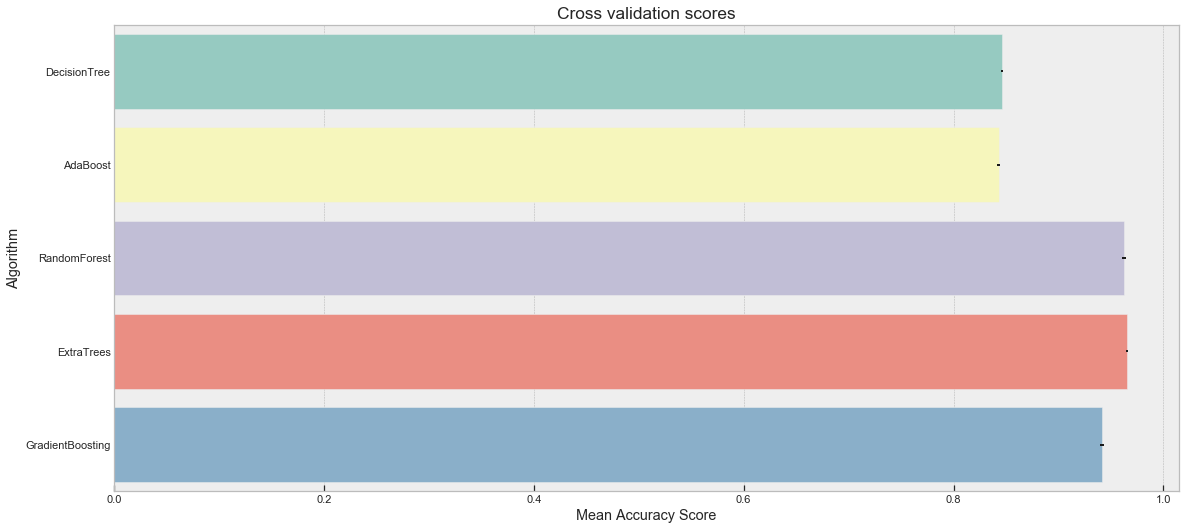

In [16]:
cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":["DecisionTree","AdaBoost",
"RandomForest","ExtraTrees","GradientBoosting"]})

plt.style.use('bmh')
plt.figure(figsize=(17,8))
g = sns.barplot("CrossValMeans","Algorithm",data = cv_res, palette="Set3",orient = "h",**{'xerr':cv_std})
g.set_xlabel("Mean Accuracy Score")
g = g.set_title("Cross validation scores")

In [17]:
cv_res

,CrossValMeans,CrossValerrors,Algorithm
0,0.84633,0.00085,DecisionTree
1,0.84293,0.00164,AdaBoost
2,0.96283,0.00187,RandomForest
3,0.96521,0.00128,ExtraTrees
4,0.94150,0.00187,GradientBoosting


### Looking at the Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix #for confusion matrix
from sklearn.model_selection import cross_val_predict
f,ax=plt.subplots(3,2,figsize=(17,12))

y_pred = cross_val_predict(DecisionTreeClassifier(random_state=random_state),X_train,Y_train,cv=5)
sns.heatmap(confusion_matrix(Y_train,y_pred),ax=ax[0,0],annot=True,fmt='2.0f')
ax[0,0].set_title('Decision Tree Classifier')

y_pred = cross_val_predict(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state)),X_train,Y_train,cv=5)
sns.heatmap(confusion_matrix(Y_train,y_pred),ax=ax[0,1],annot=True,fmt='2.0f')
ax[0,1].set_title('AdaBoost Classifier')

y_pred = cross_val_predict(RandomForestClassifier(random_state=random_state),X_train,Y_train,cv=5)
sns.heatmap(confusion_matrix(Y_train,y_pred),ax=ax[1,0],annot=True,fmt='2.0f')
ax[1,0].set_title('Random Forest Classifier')

y_pred = cross_val_predict(ExtraTreesClassifier(random_state=random_state),X_train,Y_train,cv=5)
sns.heatmap(confusion_matrix(Y_train,y_pred),ax=ax[1,1],annot=True,fmt='2.0f')
ax[1,1].set_title('Extra Trees Classifier')

y_pred = cross_val_predict(GradientBoostingClassifier(random_state=random_state),X_train,Y_train,cv=5)
sns.heatmap(confusion_matrix(Y_train,y_pred),ax=ax[2,0],annot=True,fmt='2.0f')
ax[2,0].set_title('Gradient Boosting Classifier')

                                                 
plt.subplots_adjust(hspace=0.4,wspace=0.5)
plt.show()

### Exhaustive Grid Search

We configure different classifers for an exhaustive grid search using GridSearchCV. The apparent best classifier is then used to make predictions on the test set.

In [55]:
from time import time
names = ["Decision Tree", "AdaBoost", "Random Forest", "GradientBoosting", "Extra Trees Classifier"]
N_JOBS=24
rs = np.random.RandomState(2)

y_train = Y_train
y_test = Y_test

classifiers = [
    
    GridSearchCV(DecisionTreeClassifier(random_state=rs),
                 param_grid={'max_depth': [3, 5, 8, 10]},
                 refit=True, cv=5, n_jobs=N_JOBS),

    GridSearchCV(AdaBoostClassifier(DecisionTreeClassifier(max_depth=5),
                                    random_state=rs, n_estimators=200),
                 param_grid={'learning_rate': [0.01, 0.1, 0.5, 1, 10]},
                 refit=True, cv=5, n_jobs=N_JOBS),   
    
    GridSearchCV(RandomForestClassifier(random_state=rs),
                 param_grid={'max_depth': [3, 5, 8, 10],
                             'n_estimators': [300],
                             'max_features': ['sqrt','auto']}, 
                 refit=True, cv=5, n_jobs=N_JOBS),
       
    GridSearchCV(GradientBoostingClassifier(random_state=rs),
                param_grid={'learning_rate': [0.01, 0.1, 0.2],
                           'n_estimators': [200],
                           'max_depth': [5, 10, 20]},
                 refit=True, cv=5, n_jobs=N_JOBS) ,
    
    GridSearchCV(ExtraTreesClassifier(random_state=rs),
                param_grid={'criterion': ['gini', 'entropy'],
                            'max_features': ['sqrt', 'auto'],
                            'min_samples_leaf': range(20,50,5),
                            'min_samples_split': range(15,36,5)},
                 refit=True, cv=5, n_jobs=N_JOBS)
        

]

clf_trained_dict = {}
preds = {}

# Iterate over classifiers
for name, clf in zip(names, classifiers):
    print(f"Evaluating classifier: {name}")

    scaler = StandardScaler()  # Scale to mean = 0 and std_dev = 1
    X_train_scaled = scaler.fit_transform(X_train) # Fit to training data
    X_test_scaled = scaler.transform(X_test)   # Scale test data based on scaler fitted
    
    # Fit the classifer on the tranining set
    t0 = time()
    clf.fit(X_train_scaled, y_train)
    print("Training time:", round(time()-t0, 4), "s")

    # Make predictions on the training set
    t1 = time()
    predictions = clf.predict(X_train_scaled)
    print("Prediction time:", round(time()-t1, 4), "s")

    # Evaluate classifier
    print(f"The best parameters are {clf.best_params_} (score = {clf.best_score_:2f}) \n")
    print("Grid scores on training set:", "\n")
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()
    
    # Save predictions and classifier
    preds[f'{name}'] = predictions
    clf_trained_dict[f'{name}'] = clf

Evaluating classifier: Decision Tree
Training time: 2.7257 s
Prediction time: 0.001 s
The best parameters are {'max_depth': 10} (score = 0.803202) 

Grid scores on training set: 

0.610 (+/-0.011) for {'max_depth': 3}
0.674 (+/-0.018) for {'max_depth': 5}
0.757 (+/-0.031) for {'max_depth': 8}
0.803 (+/-0.020) for {'max_depth': 10}

Evaluating classifier: AdaBoost
Training time: 10.9807 s
Prediction time: 0.1077 s
The best parameters are {'learning_rate': 0.5} (score = 0.913370) 

Grid scores on training set: 

0.876 (+/-0.044) for {'learning_rate': 0.01}
0.908 (+/-0.044) for {'learning_rate': 0.1}
0.913 (+/-0.029) for {'learning_rate': 0.5}
0.908 (+/-0.022) for {'learning_rate': 1}
0.400 (+/-0.107) for {'learning_rate': 10}

Evaluating classifier: Random Forest
Training time: 7.4501 s
Prediction time: 0.0987 s
The best parameters are {'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 300} (score = 0.901925) 

Grid scores on training set: 

0.688 (+/-0.029) for {'max_depth': 3, '


## Best Parameters

- "DecisionTree" - {'max_depth': 10}
- "AdaBoost" -  {'learning_rate': 0.5} 
- "RandomForest" - {'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 300}
- "ExtraTrees" - {'criterion': 'entropy', 'max_features': 'sqrt', 'min_samples_leaf': 20, 'min_samples_split': 15}
- "GradientBoosting" - {'learning_rate': 0.2, 'max_depth': 10, 'n_estimators': 200}

# Comparison Table of ML based Models

DecisionTree

 clasification report:
               precision    recall  f1-score   support

           0       0.92      0.92      0.92      1247
           1       0.92      0.95      0.93      1382
           2       0.84      0.81      0.82      1247
           3       0.81      0.77      0.79      1312
           4       0.84      0.82      0.83      1230
           5       0.81      0.79      0.80      1182
           6       0.89      0.85      0.87      1287
           7       0.88      0.88      0.88      1320
           8       0.76      0.81      0.78      1127
           9       0.78      0.85      0.81      1266

    accuracy                           0.85     12600
   macro avg       0.84      0.84      0.84     12600
weighted avg       0.85      0.85      0.85     12600


 confussion matrix:



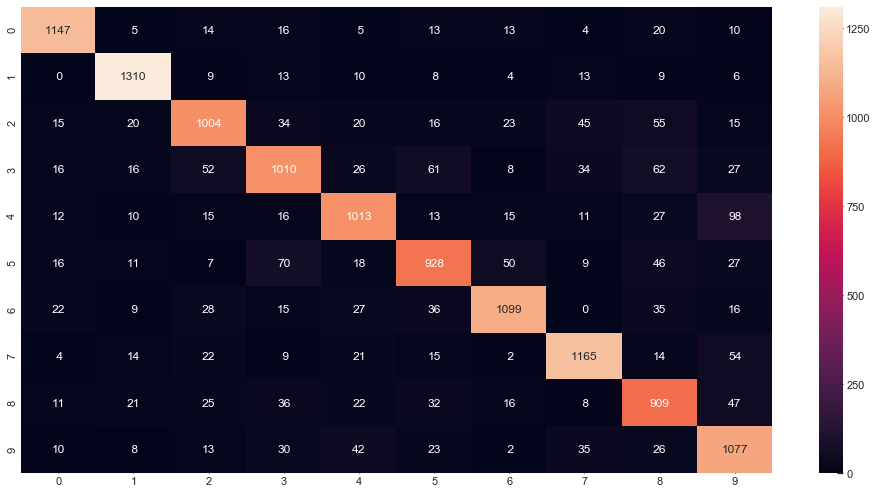



AdaBoost

 clasification report:
               precision    recall  f1-score   support

           0       0.92      0.92      0.92      1247
           1       0.94      0.94      0.94      1382
           2       0.82      0.82      0.82      1247
           3       0.81      0.81      0.81      1312
           4       0.85      0.84      0.85      1230
           5       0.83      0.80      0.81      1182
           6       0.88      0.87      0.88      1287
           7       0.89      0.89      0.89      1320
           8       0.79      0.83      0.81      1127
           9       0.83      0.84      0.84      1266

    accuracy                           0.86     12600
   macro avg       0.86      0.86      0.86     12600
weighted avg       0.86      0.86      0.86     12600


 confussion matrix:



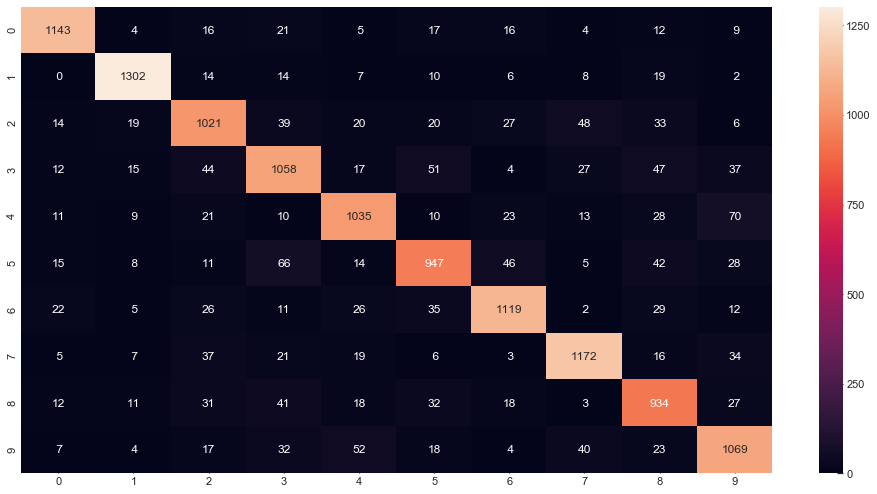



RandomForest

 clasification report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      1247
           1       0.97      0.98      0.98      1382
           2       0.94      0.95      0.94      1247
           3       0.94      0.91      0.92      1312
           4       0.94      0.93      0.94      1230
           5       0.96      0.94      0.95      1182
           6       0.95      0.97      0.96      1287
           7       0.95      0.94      0.95      1320
           8       0.93      0.92      0.93      1127
           9       0.90      0.92      0.91      1266

    accuracy                           0.95     12600
   macro avg       0.95      0.94      0.94     12600
weighted avg       0.95      0.95      0.95     12600


 confussion matrix:



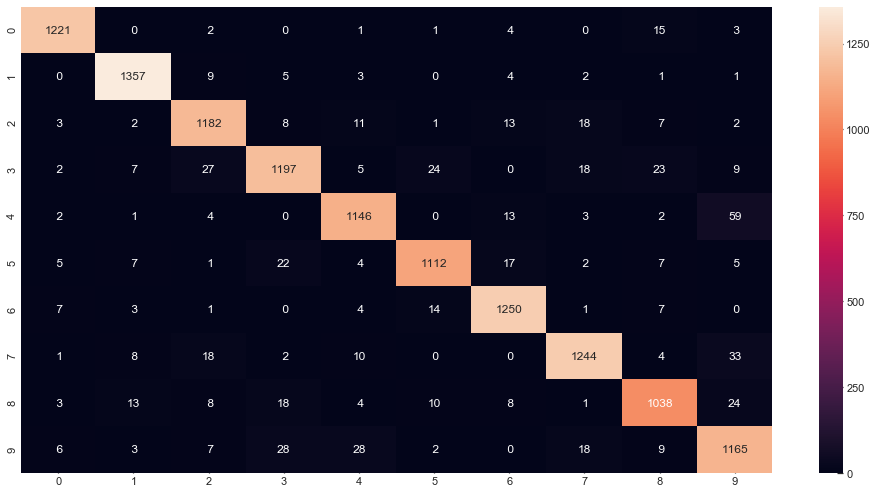



ExtraTrees

 clasification report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97      1247
           1       0.97      0.98      0.98      1382
           2       0.92      0.93      0.93      1247
           3       0.92      0.90      0.91      1312
           4       0.93      0.93      0.93      1230
           5       0.94      0.92      0.93      1182
           6       0.94      0.97      0.95      1287
           7       0.94      0.95      0.94      1320
           8       0.92      0.91      0.92      1127
           9       0.92      0.90      0.91      1266

    accuracy                           0.94     12600
   macro avg       0.94      0.94      0.94     12600
weighted avg       0.94      0.94      0.94     12600


 confussion matrix:



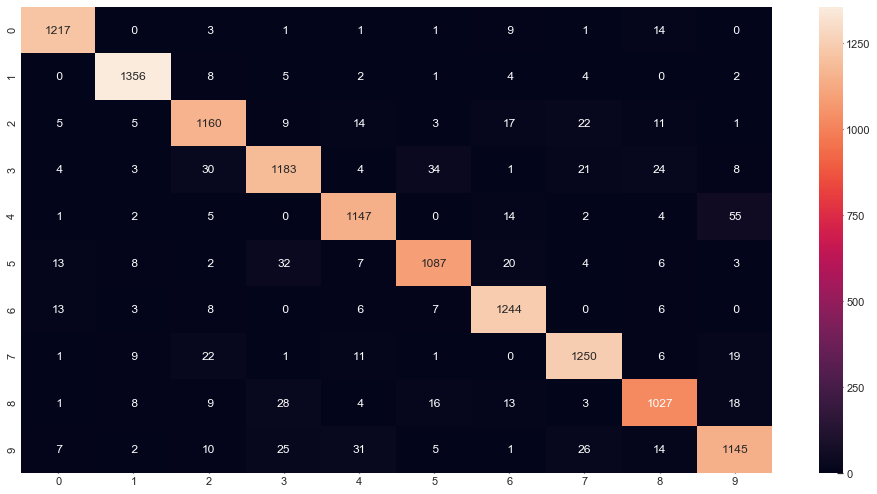



GradientBoosting

 clasification report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      1247
           1       0.99      0.98      0.99      1382
           2       0.95      0.98      0.97      1247
           3       0.97      0.94      0.95      1312
           4       0.97      0.96      0.97      1230
           5       0.96      0.97      0.96      1182
           6       0.97      0.98      0.98      1287
           7       0.98      0.97      0.97      1320
           8       0.96      0.96      0.96      1127
           9       0.95      0.96      0.95      1266

    accuracy                           0.97     12600
   macro avg       0.97      0.97      0.97     12600
weighted avg       0.97      0.97      0.97     12600


 confussion matrix:



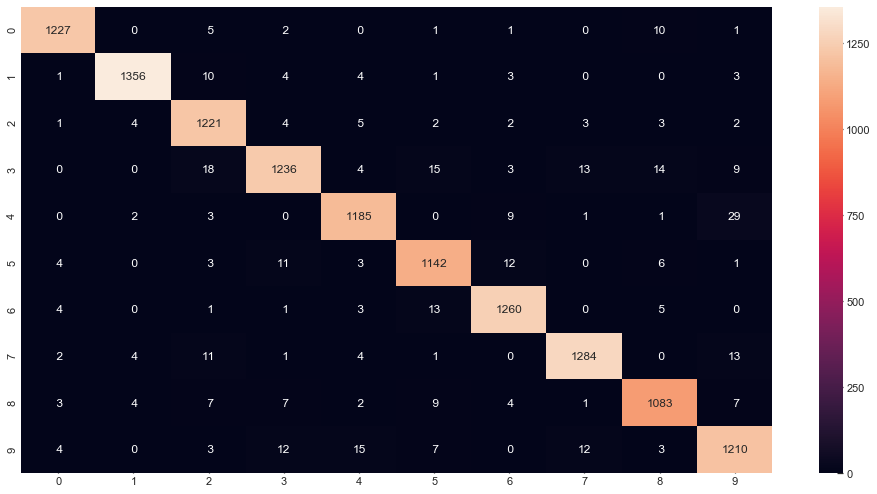

,Train Accuracy,Test Accuracy,Precision,Recall,F1 Score
Model,,,,,
DecisionTree,0.91061,0.84619,0.84499,0.84451,0.84434
AdaBoost,1.00000,0.85714,0.85580,0.85570,0.85566
RandomForest,0.97612,0.94540,0.94520,0.94487,0.94497
ExtraTrees,0.95680,0.93778,0.93726,0.93704,0.93710
GradientBoosting,1.00000,0.96857,0.96829,0.96844,0.96832


In [18]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
X_train = train.loc[:,"pixel0":"pixel783"]
Y_train = train.loc[:, "label"]
X_test = test
X_train, X_test, y_train, y_test = train_test_split(X_train, Y_train, test_size=0.30, shuffle=True)



train_accuracy = []
test_accuracy = []
precision = []
recall = []
f1 = []
models = ["DecisionTree","AdaBoost", "RandomForest","ExtraTrees","GradientBoosting"]

random_state = 2
classifiers = []
classifiers.append(DecisionTreeClassifier(random_state=random_state, max_depth = 10))
classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),random_state=random_state,learning_rate=0.5))
classifiers.append(RandomForestClassifier(random_state=random_state, max_depth = 10, max_features = 'sqrt', n_estimators=  300))
classifiers.append(ExtraTreesClassifier(random_state=random_state, criterion ='entropy', max_features = 'sqrt', min_samples_leaf = 20, min_samples_split = 15))
classifiers.append(GradientBoostingClassifier(random_state=random_state, learning_rate = 0.2, max_depth = 10, n_estimators = 200))


for classifier,model in zip(classifiers, models):
    print('='*len(model))
    print(model)
    print('='*len(model))
    classifier.fit(X_train, y_train)
    trainprediction = classifier.predict(X_train)
    prediction = classifier.predict(X_test)
    trainaccuracy = accuracy_score(y_train, trainprediction)
    testaccuracy = accuracy_score(y_test, prediction)
    train_accuracy.append(trainaccuracy)
    test_accuracy.append(testaccuracy)
    precision.append(precision_score(y_test, prediction, average='macro'))
    recall.append(recall_score(y_test, prediction, average='macro'))
    f1.append(f1_score(y_test, prediction, average='macro'))
    print('\n clasification report:\n', classification_report(y_test,prediction))
    print('\n confussion matrix:\n')
    plt.figure(figsize=(15,8))
    sns.heatmap(confusion_matrix(y_test, prediction),annot=True,fmt='2.0f')
    plt.show()
    print('\n')
    
scoreDF = pd.DataFrame({'Model' : models})
scoreDF['Train Accuracy'] = train_accuracy
scoreDF['Test Accuracy'] = test_accuracy
scoreDF['Precision'] =  precision
scoreDF['Recall'] =  recall
scoreDF['F1 Score'] = f1 

scoreDF.set_index("Model")

In [20]:
scoreDF

,Model,Train Accuracy,Test Accuracy,Precision,Recall,F1 Score
0,DecisionTree,0.91061,0.84619,0.84499,0.84451,0.84434
1,AdaBoost,1.00000,0.85714,0.85580,0.85570,0.85566
2,RandomForest,0.97612,0.94540,0.94520,0.94487,0.94497
3,ExtraTrees,0.95680,0.93778,0.93726,0.93704,0.93710
4,GradientBoosting,1.00000,0.96857,0.96829,0.96844,0.96832


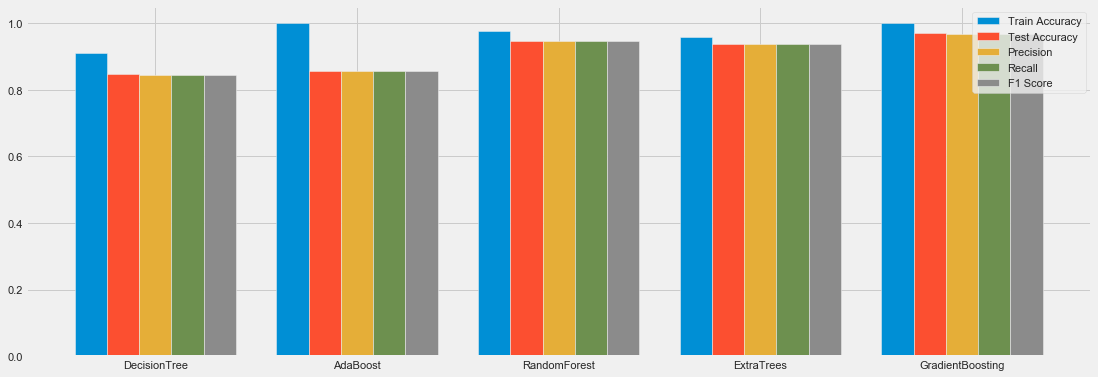

In [21]:
plt.style.use('fivethirtyeight')
def subcategorybar(X, vals, width=0.8):
    cols = ['Train Accuracy', 'Test Accuracy', 'Precision', 'Recall','F1 Score']
    n = len(vals)
    _X = np.arange(len(X))
    for i in range(n):
        plt.bar(_X - width/2. + i/float(n)*width, vals[i], width=width/float(n), align="edge")   
        
        
    plt.xticks(_X, X)
    
plt.figure(figsize = (17,6))
subcategorybar(models, [scoreDF['Train Accuracy'], scoreDF['Test Accuracy'], scoreDF['Precision'], scoreDF['Recall'], scoreDF['F1 Score']])
cols = ['Train Accuracy', 'Test Accuracy', 'Precision', 'Recall','F1 Score']
plt.legend(cols)
plt.show()

## Best Machine Learning Model - Gradient Boosting Machine with tuned Parameters

---

# Deep Learning Based Models




# Convolutional Neural Networks .

<center><img src = "https://adeshpande3.github.io/assets/Cover.png"><img></center>

Convolutional Neural Networks are very powerful at detecting features, like edges, parts of objets, 
and even complete objects. The more deep the network is, the more the performance will increase, but
you may face the problem of vanishing and exploding gradients.

Vanishing and exploding gradients. When you go deeper and deeper by stacking layers, the network learns intricate functions. Although this type of model building might be benign, and aids us in increasing the accuracy, it fails to learn identity functions. Theoretically, machine learning practitioners have established that as the number of layers increase, the accuracy increases. Empirically, it has been shown that this statement is far from the truth. In fact, as the layers kept increasing, the gain in accuracy was diminishing. The culprit, here, is the gradients. Succumbing to the depth of the layers, the gradients either vanished, i.e. became too small for the update to make some worthwhile progress, or exploded, i.e., became too big for the update to overshoot the minima.

### ConvNets history : 

Since the 1950s, the early days of artificial intelligence, computer scientists have been trying to build computers that can make sense of visual data. In the ensuing decades, the field, which has become known as computer vision, saw incremental advances. In 2012, computer vision took a quantum leap when a group of researchers from the University of Toronto developed an AI model that surpassed the best image recognition algorithms by a large margin.

The AI system, which became known as AlexNet (named after its main creator, Alex Krizhevsky), won the 2012 ImageNet computer vision contest with an amazing 85 percent accuracy. The runner-up scored a modest 74 percent on the test.

At the heart of the AlexNet was a convolutional neural network (CNN), a specialized type of artificial neural network that roughly mimics the human vision system. In recent years, CNNs have become pivotal to many computer vision applications. Here’s what you need to know about the history and workings of CNNs.
<center>
<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcTc9CsPOtPBGGTm8zz-mIKtxBkGEHllr3VkEA&usqp=CAU"><img></center>

Convolutional neural networks, also called ConvNets, were first introduced in the 1980s by Yann LeCun, a postdoctoral computer science researcher. LeCun had built on the work done by Kunihiko Fukushima, a Japanese scientist who, a few years earlier, had invented the neocognitron, a very basic image recognition neural network.



# Optimised CNN

In [1]:
# Import the necessary libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline

np.random.seed(2)

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from keras.datasets import mnist

sns.set(style='white', context='notebook', palette='deep')

In [2]:
# Download Data
train = pd.read_csv("../data/train.csv")
test = pd.read_csv("../data/test.csv")

Y_train = train["label"]
X_train = train.drop(labels = ["label"], axis = 1) 

In [3]:
# Load more data sets, if there is no such data, validation accuracy = 0.9964
# With this batch of data, the validation accuracy can reach 0.9985
(x_train1, y_train1), (x_test1, y_test1) = mnist.load_data()

train1 = np.concatenate([x_train1, x_test1], axis=0)
y_train1 = np.concatenate([y_train1, y_test1], axis=0)

Y_train1 = y_train1
X_train1 = train1.reshape(-1, 28*28)

In [4]:
# Normalize data to make CNN faster
X_train = X_train / 255.0
test = test / 255.0

X_train1 = X_train1 / 255.0

# Reshape Picture is 3D array (height = 28px, width = 28px , canal = 1)
X_train = np.concatenate((X_train.values, X_train1))
Y_train = np.concatenate((Y_train, Y_train1))

X_train = X_train.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)

# Convert label to one hot vectors (ex : 2 -> [0,0,1,0,0,0,0,0,0,0])
Y_train = to_categorical(Y_train, num_classes = 10)

# Split dataset into training set and validation set
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.1, random_state=2)

In [5]:
# Creating CNN model
"""
  [[Conv2D->relu]*2 -> BatchNormalization -> MaxPool2D -> Dropout]*2 -> 
  [Conv2D->relu]*2 -> BatchNormalization -> Dropout -> 
  Flatten -> Dense -> BatchNormalization -> Dropout -> Out
"""
model = Sequential()

model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', activation ='relu', input_shape = (28,28,1)))
model.add(BatchNormalization())

model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', activation ='relu'))
model.add(BatchNormalization())

model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(BatchNormalization())

model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 64, kernel_size = (3,3), padding = 'Same',  activation ='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Dense(10, activation = "softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 64)        1664      
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 28, 64)        256       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 64)        102464    
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 64)        256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        3

In [ ]:
# Define Optimizer
optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

# Compile model
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

# Audjusting learning rate
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=2, 
                                            factor=0.5, 
                                            min_lr=0.00001)

#Adjusting epochs and batch_size
epochs = 20
batch_size = 1024

#Data Augmentation 
datagen = ImageDataGenerator(
        featurewise_center=False, # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images
datagen.fit(X_train)

#Prediction model
history = model.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_val,Y_val),
                              verbose = 1, steps_per_epoch=X_train.shape[0] // batch_size
                              , callbacks=[learning_rate_reduction])

Epoch 1/20
98/98 [==============================] - 624s 6s/step - loss: 0.0785 - accuracy: 0.9754 - val_loss: 5.6553 - val_accuracy: 0.2849
Epoch 2/20
98/98 [==============================] - 650s 7s/step - loss: 0.0418 - accuracy: 0.9874 - val_loss: 2.1674 - val_accuracy: 0.4911
Epoch 3/20
98/98 [==============================] - 733s 7s/step - loss: 0.0339 - accuracy: 0.9895 - val_loss: 0.2448 - val_accuracy: 0.9340
Epoch 4/20
98/98 [==============================] - 680s 7s/step - loss: 0.0279 - accuracy: 0.9913 - val_loss: 0.0295 - val_accuracy: 0.9906
Epoch 5/20
98/98 [==============================] - 616s 6s/step - loss: 0.0247 - accuracy: 0.9922 - val_loss: 0.0153 - val_accuracy: 0.9953
Epoch 6/20
98/98 [==============================] - 611s 6s/step - loss: 0.0246 - accuracy: 0.9924 - val_loss: 0.0149 - val_accuracy: 0.9955
Epoch 7/20
98/98 [==============================] - 626s 6s/step - loss: 0.0205 - accuracy: 0.9933 - val_loss: 0.0175 - val_accuracy: 0.9949
Epoch 8/20
98

In [ ]:
# Draw the loss and accuracy curves of the training set and the validation set.
# Can judge whether it is under-fitting or over-fitting.

fig, ax = plt.subplots(2,1, figsize=(17,10))
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['acc'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_acc'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

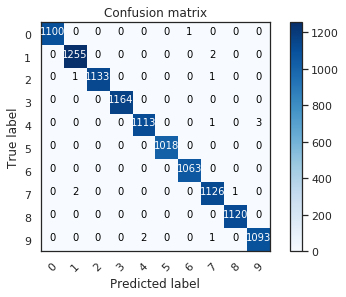

In [20]:
# Draw a confusion matrix that can be used to observe high false positives

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize=(17,7))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
Y_pred = model.predict(X_val)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(Y_val,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10)) 

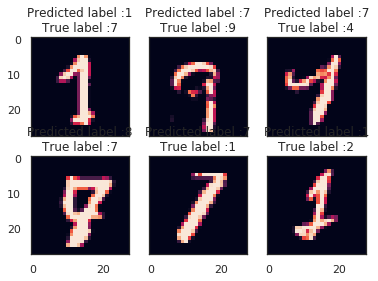

In [21]:
# Show some wrong results, and the difference between the predicted label and the real labe
errors = (Y_pred_classes - Y_true != 0)

Y_pred_classes_errors = Y_pred_classes[errors]
Y_pred_errors = Y_pred[errors]
Y_true_errors = Y_true[errors]
X_val_errors = X_val[errors]

def display_errors(errors_index,img_errors,pred_errors, obs_errors):
    """ This function shows 6 images with their predicted and real labels"""
    n = 0
    nrows = 2
    ncols = 3
    fig, ax = plt.subplots(nrows,ncols,sharex=True,sharey=True, figsize=(17,10))
    for row in range(nrows):
        for col in range(ncols):
            error = errors_index[n]
            ax[row,col].imshow((img_errors[error]).reshape((28,28)))
            ax[row,col].set_title("Predicted label :{}\nTrue label :{}".format(pred_errors[error],obs_errors[error]))
            n += 1

# Probabilities of the wrong predicted numbers
Y_pred_errors_prob = np.max(Y_pred_errors,axis = 1)

# Predicted probabilities of the true values in the error set
true_prob_errors = np.diagonal(np.take(Y_pred_errors, Y_true_errors, axis=1))

# Difference between the probability of the predicted label and the true label
delta_pred_true_errors = Y_pred_errors_prob - true_prob_errors

# Sorted list of the delta prob errors
sorted_dela_errors = np.argsort(delta_pred_true_errors)

# Top 6 errors 
most_important_errors = sorted_dela_errors[-6:]

# Show the top 6 errors
display_errors(most_important_errors, X_val_errors, Y_pred_classes_errors, Y_true_errors)

In [22]:
# Make predictions about test sets
results = model.predict(test)

# Convert one-hot vector to number
results = np.argmax(results,axis = 1)

results = pd.Series(results,name="Label")

# Save the final result in cnn_mnist_submission.csv
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),results],axis = 1)

submission.to_csv("cnn_mnist_submission.csv",index=False)

## Transfer Learning based models

In [3]:
from matplotlib import pyplot as plt 
import os 
import scipy
import numpy as np
import pandas as pd
import IPython
import tensorflow as tf
import keras 
import seaborn as sns
import warnings as w
import sklearn.metrics as Metric_tools
from sklearn.model_selection import train_test_split
import cv2

%load_ext autoreload
%autoreload 2

np.random.seed(1)
w.filterwarnings('ignore')

In [5]:
sample_submission = pd.read_csv("../data/sample_submission.csv")
test_file = pd.read_csv("../data/test.csv")
train_file = pd.read_csv("../data/train.csv")

X_train = train_file.loc[:,"pixel0":"pixel783"]
Y_train = train_file.loc[:, "label"]
X_test = test_file

Let's visualize the mean of each pixel in a bar plot. 

**Before Scaling :**
   - The content in the following plots represents the data before scaling, you can see that the features vary. The first features have 0 in the mean value, that's because all the values in the first features are zeros (`Black background`).

In [9]:
disc_train = train_file.describe().T
disc_test = test_file.describe().T

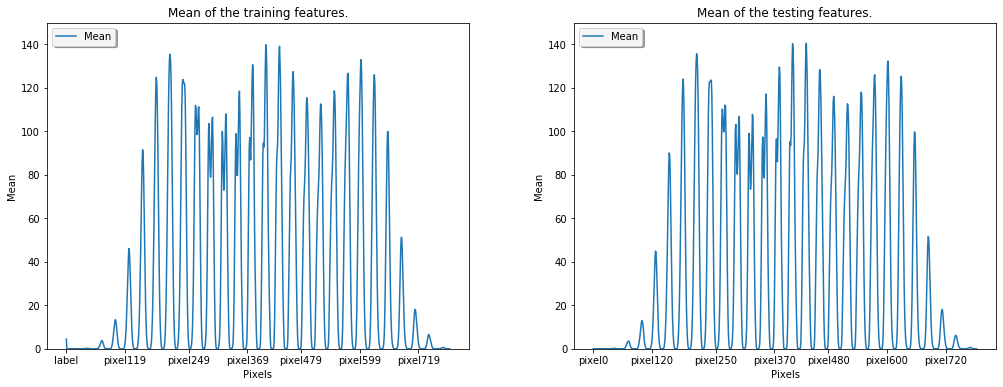

In [11]:
fig, ax_arr = plt.subplots(1, 2, figsize=(17, 6))
fig.subplots_adjust(wspace=0.25, hspace=0.025)

ax_arr = ax_arr.ravel()

sets = iter([(disc_train, "training"), (disc_test, "testing")])
for i, ax in enumerate(ax_arr):
    set_ = next(sets)
    ax.plot(set_[0].loc[:, "mean"], label="Mean")
    ax.set_title("Mean of the {} features.".format(set_[1]))
    ax.set_xlabel('Pixels')
    ax.set_ylabel('Mean')
    ax.set_xticks([0, 120, 250, 370, 480, 600, 720])
    ax.legend(loc="upper left", shadow=True, frameon=True, framealpha=0.9)
    ax.set_ylim([0, 150])
plt.show()

**Normalization :**
   - Normalizing the data helps with converging to the global minima, instead of having a lot of local minima.
   - Similarly, the goal of normalization is to change the values of numeric columns in the dataset to a common scale, without distorting differences in the ranges of values. For machine learning, every dataset does not require normalization. It is required only when features have different ranges.For example, consider a data set containing two features, age, and income(x2). Where age ranges from 0–100, while income ranges from 0–100,000 and higher. Income is about 1,000 times larger than age. So, these two features are in very different ranges. When we do further analysis, like multivariate linear regression, for example, the attributed income will intrinsically influence the result more due to its larger value. But this doesn’t necessarily mean it is more important as a predictor. So we normalize the data to bring all the variables to the same range.

In [12]:
train_file_norm = train_file.iloc[:, 1:] / 255.0
test_file_norm = test_file / 255.0

**Describing the normalized dataset again.**

In [13]:
disc_train = train_file_norm.describe().T
disc_test = test_file_norm.describe().T

**Plotting the mean to see what's the difference.**

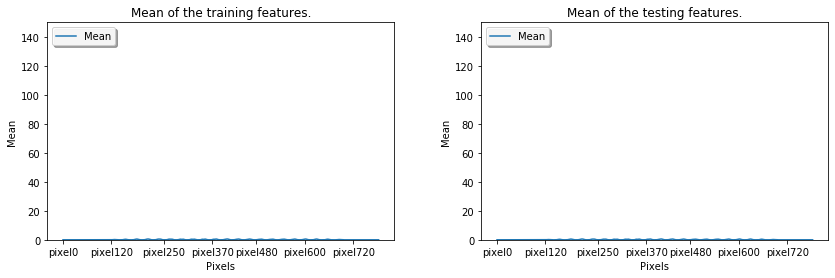

In [14]:
fig, ax_arr = plt.subplots(1, 2, figsize=(14, 4))
fig.subplots_adjust(wspace=0.25, hspace=0.025)

ax_arr = ax_arr.ravel()

sets = iter([(disc_train, "training"), (disc_test, "testing")])
for i, ax in enumerate(ax_arr):
    set_ = next(sets)
    ax.plot(set_[0].loc[:, "mean"], label="Mean")
    ax.set_title("Mean of the {} features.".format(set_[1]))
    ax.set_xlabel('Pixels')
    ax.set_ylabel('Mean')
    ax.set_xticks([0, 120, 250, 370, 480, 600, 720])
    ax.legend(loc="upper left", shadow=True, frameon=True, framealpha=0.9)
    ax.set_ylim([0, 150])
plt.show()

<div class="alert-warning" style="background-color:lightblue ; color:black; padding:5px; border-radius:2px">
As you see above, the mean of all the features is close to zero, that means all of the features have
a similar mean. This will help increasing the performance of our model.
</div>

### Displaying some examples .

After doing this important preprocessing step, we're going to display 64 randomly chosen examples in 
a nice grid.

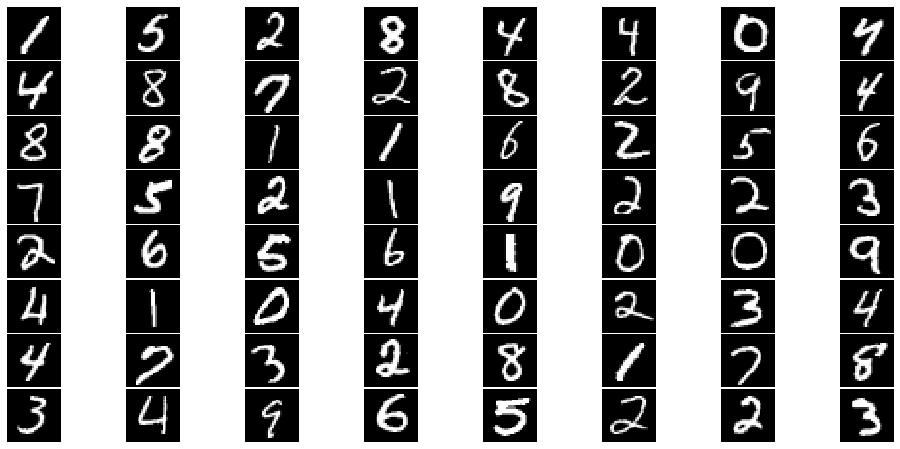

In [15]:
rand_indices = np.random.choice(train_file_norm.shape[0], 64, replace=False)
examples = train_file_norm.iloc[rand_indices, :]

fig, ax_arr = plt.subplots(8, 8, figsize=(17, 8))
fig.subplots_adjust(wspace=.025, hspace=.025)

ax_arr = ax_arr.ravel()
for i, ax in enumerate(ax_arr):
    ax.imshow(examples.iloc[i, :].values.reshape(28, 28), cmap="gray")
    ax.axis("off")
    
plt.show()    

**Let's now see how the values in the output target are distributed.**

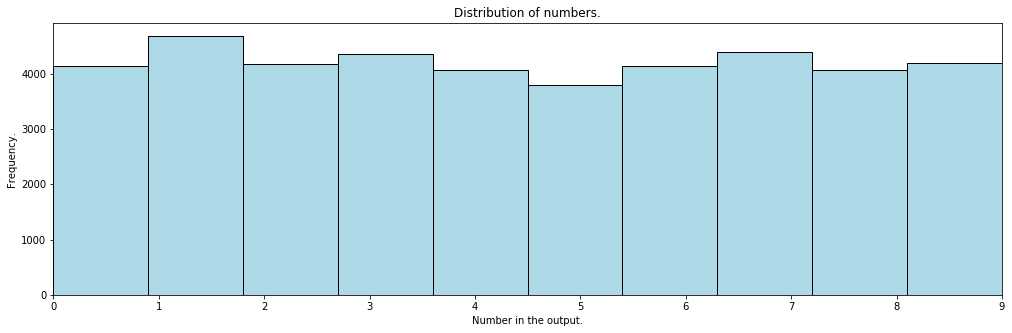

In [16]:
plt.figure(figsize=(17, 5))
plt.hist(train_file.iloc[:, 0], bins=10, edgecolor="black", facecolor="lightblue")
plt.xlabel('Number in the output.')
plt.ylabel('Frequency.')
plt.title('Distribution of numbers.')
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
plt.xlim([0, 9])
pass

### Preparing the inputs : 

We're going to prepare the input images, and put them in the correct shape.
The shapes should be (`num_examples`, $n_h, n_w, n_c$).

$n_c$ = Number of channels (1 Gray-scale).

$n_h$ = Height of images.

$n_w$ = Width of images.

In [17]:
num_examples_train = train_file.shape[0]
num_examples_test = test_file.shape[0]
n_h = 32
n_w = 32
n_c = 3

In [18]:
Train_input_images = np.zeros((num_examples_train, n_h, n_w, n_c))
Test_input_images = np.zeros((num_examples_test, n_h, n_w, n_c))

In [19]:
for example in range(num_examples_train):
    Train_input_images[example,:28,:28,0] = train_file.iloc[example, 1:].values.reshape(28,28)
    Train_input_images[example,:28,:28,1] = train_file.iloc[example, 1:].values.reshape(28,28)
    Train_input_images[example,:28,:28,2] = train_file.iloc[example, 1:].values.reshape(28,28)
    
for example in range(num_examples_test):
    Test_input_images[example,:28,:28,0] = test_file.iloc[example, :].values.reshape(28,28)
    Test_input_images[example,:28,:28,1] = test_file.iloc[example, :].values.reshape(28,28)
    Test_input_images[example,:28,:28,2] = test_file.iloc[example, :].values.reshape(28,28)

In [20]:
for example in range(num_examples_train):
    Train_input_images[example] = cv2.resize(Train_input_images[example], (n_h, n_w))
    
for example in range(num_examples_test):
    Test_input_images[example] = cv2.resize(Test_input_images[example], (n_h, n_w))

In [21]:
Train_labels = np.array(train_file.iloc[:, 0])

In [22]:
print("Shape of train input images : ", Train_input_images.shape)
print("Shape of test input images : ", Test_input_images.shape)
print("Shape of train labels : ", Train_labels.shape)

Shape of train input images :  (42000, 32, 32, 3)
Shape of test input images :  (28000, 32, 32, 3)
Shape of train labels :  (42000,)


### Data augmentation : 

Image data augmentation is a technique that can be used to artificially expand the size of a training dataset by creating modified versions of images in the dataset.

Training deep learning neural network models on more data can result in more skillful models, and the augmentation techniques can create variations of the images that can improve the ability of the fit models to generalize what they have learned to new images.

The Keras deep learning neural network library provides the capability to fit models using image data augmentation via the ImageDataGenerator class.

<center><img src="https://nanonets.com/blog/content/images/2018/11/1_dJNlEc7yf93K4pjRJL55PA--1-.png"><img></center>

In [23]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rotation_range=27,
    width_shift_range=0.3,
    height_shift_range=0.2,
    shear_range=0.3,
    zoom_range=0.2,
    horizontal_flip=False)

validation_datagen = ImageDataGenerator()

# ResNet

### Building the structure of a CNN (ResNet50)

In deep learning, a convolutional neural network (CNN, or ConvNet) is a class of deep neural networks, most commonly applied to analyzing visual imagery. They are also known as shift invariant or space invariant artificial neural networks (SIANN), based on their shared-weights architecture and translation invariance characteristics. They have applications in image and video recognition, recommender systems, image classification, medical image analysis, natural language processing, and financial time series.

In [24]:
pretrained_model = keras.applications.resnet50.ResNet50(input_shape=(n_h, n_w, n_c),include_top=False, weights='imagenet')

model = keras.Sequential([
    pretrained_model,
    keras.layers.Flatten(),
    keras.layers.Dense(units=60, activation='relu'),
    keras.layers.Dense(units=10, activation='softmax')
])

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 1, 1, 2048)        23587712  
_________________________________________________________________
flatten (Flatten)            (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 60)                122940    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                610       
Total params: 23,711,262
Trainable params: 23,658,142
Non-trainable params: 53,120
_________________________________________________________________


#### Compile the model.

In [26]:
Optimizer = 'RMSprop'

model.compile(optimizer=Optimizer, 
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

### Adding the development set.

In [27]:
train_images, dev_images, train_labels, dev_labels = train_test_split(Train_input_images, 
                                                                      Train_labels,
                                                                      test_size=0.1, train_size=0.9,
                                                                      shuffle=True,
                                                                      random_state=44)
test_images = Test_input_images

In [28]:
class myCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if (logs.get('accuracy') > 0.999999):
            print("Stop training!")
            self.model.stop_training = True

In [29]:
callbacks = myCallback()

In [30]:
EPOCHS = 10
batch_size = 212

history = model.fit_generator(train_datagen.flow(train_images,train_labels, batch_size=batch_size),
                         steps_per_epoch=train_images.shape[0] / batch_size, 
                         epochs=EPOCHS,   
                         validation_data=validation_datagen.flow(dev_images,dev_labels,
                                                                 batch_size=batch_size),
                         validation_steps=dev_images.shape[0] / batch_size,
                         callbacks=[callbacks])

Epoch 1/10
178/178 [==============================] - 1542s 9s/step - loss: 0.9890 - accuracy: 0.7122 - val_loss: 470.3910 - val_accuracy: 0.1233
Epoch 2/10
178/178 [==============================] - 1539s 9s/step - loss: 0.2182 - accuracy: 0.9471 - val_loss: 155.3060 - val_accuracy: 0.2788
Epoch 3/10
178/178 [==============================] - 1532s 9s/step - loss: 0.1466 - accuracy: 0.9604 - val_loss: 99.8417 - val_accuracy: 0.4650
Epoch 4/10
178/178 [==============================] - 1175s 7s/step - loss: 0.1365 - accuracy: 0.9659 - val_loss: 23.8204 - val_accuracy: 0.6900
Epoch 5/10
178/178 [==============================] - 1400s 8s/step - loss: 0.1813 - accuracy: 0.9676 - val_loss: 0.6243 - val_accuracy: 0.9407
Epoch 6/10
178/178 [==============================] - 1594s 9s/step - loss: 0.1240 - accuracy: 0.9693 - val_loss: 15.6069 - val_accuracy: 0.8243
Epoch 7/10
178/178 [==============================] - 1965s 11s/step - loss: 0.1258 - accuracy: 0.9711 - val_loss: 0.6385 - val_a

In [ ]:
plt.style.use('ggplot')  
 
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']  
loss = history.history['loss'] 
val_loss = history.history['val_loss'] 

epochs = range(len(acc))

fig, ax = plt.subplots(1, 2, figsize=(15, 5))
fig.subplots_adjust(wspace=0.15, hspace=0.025)
ax = ax.ravel()

ax[0].plot(epochs, acc, 'r', label='Training accuracy')
ax[0].plot(epochs, val_acc, 'b', label='Validation accuracy')
ax[0].set_title('Training and validation accuracy')
ax[0].legend(loc="upper left", shadow=True, frameon=True, fancybox=True, framealpha=0.9)

ax[1].plot(epochs, loss, 'r', label='Training Loss')
ax[1].plot(epochs, val_loss, 'b', label='Validation Loss')
ax[1].set_title('Training and validation loss')
ax[1].legend(loc="upper right", shadow=True, frameon=True, fancybox=True, framealpha=0.9)

plt.show()

[autoreload of ipywidgets.widgets.widget failed: Traceback (most recent call last):
  File "C:\Users\shiva\Anaconda3\lib\site-packages\IPython\extensions\autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "C:\Users\shiva\Anaconda3\lib\site-packages\IPython\extensions\autoreload.py", line 450, in superreload
    update_generic(old_obj, new_obj)
  File "C:\Users\shiva\Anaconda3\lib\site-packages\IPython\extensions\autoreload.py", line 387, in update_generic
    update(a, b)
  File "C:\Users\shiva\Anaconda3\lib\site-packages\IPython\extensions\autoreload.py", line 357, in update_class
    update_instances(old, new)
  File "C:\Users\shiva\Anaconda3\lib\site-packages\IPython\extensions\autoreload.py", line 317, in update_instances
    update_instances(old, new, obj, visited)
  File "C:\Users\shiva\Anaconda3\lib\site-packages\IPython\extensions\autoreload.py", line 317, in update_instances
    update_instances(old, new, obj, visited)
  File "C:\Users\shiva

###  Submitting the prediction.


In [29]:
# Make predictions about test sets
results = model.predict(test)

# Convert one-hot vector to number
results = np.argmax(results,axis = 1)

results = pd.Series(results,name="Label")

# Save the final result in cnn_mnist_submission.csv
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),results],axis = 1)

submission.to_csv("cnn_RESNET_mnist_submission.csv",index=False)

# VGG Net
# Inception Net
# Xception Net

Now, we will use the following pre-trained models of CNN and compare as well. Earlier we used ResNet.
1. VGG Net (Visual Geometry Group)
2. Inception Net
3. Xception Net

We will start with MNIST data, Digit Recognizer problem.
https://www.kaggle.com/c/digit-recognizer/overview

In [1]:
import numpy as np
import pandas as pd

input_train = pd.read_csv("../data/train.csv")
input_test = pd.read_csv("../data/test.csv")
print("Train data Shape : "+str(input_train.shape))
print("Test data Shape : "+str(input_test.shape))
#Check any missing data
print("Any missing data : "+str(np.any(input_train.isnull().sum())))
input_train.head(2)

Train data Shape : (42000, 785)
Test data Shape : (28000, 784)
Any missing data : False


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [2]:
##Prepare
Y_train = input_train["label"]
X_train = input_train.drop(labels = ["label"],axis = 1) 
# Reshape image in 3 dimensions (height = 28px, width = 28px , canal = 1)
X_train = X_train.values.reshape(-1,28,28,1)
print("Features Shape : "+str(X_train.shape))
print("Labels Shape : "+str(Y_train.shape))
input_train.groupby("label",axis=0).size()

del input_train # free some space

Features Shape : (42000, 28, 28, 1)
Labels Shape : (42000,)


In [3]:
#Normalize
X_train = X_train / 255
X_train  = X_train.round()
input_test = input_test / 255
input_test  = input_test.round()

### One hot encoding on labels
We can observe that labels are in the range of 0-9, but for clasification we will convert that into onehot encoding. Refer : https://machinelearningmastery.com/why-one-hot-encode-data-in-machine-learning/

In [4]:
# Encode labels to one hot vectors (ex : 2 -> [0,0,1,0,0,0,0,0,0,0])
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
Y_train = to_categorical(Y_train, num_classes = 10)

### Cross Validation
We need to split our data set for validation. Read more about it : https://towardsdatascience.com/why-and-how-to-cross-validate-a-model-d6424b45261f


In [5]:
from sklearn.model_selection import train_test_split
random_seed = 2
# Split the train and the validation set for the fitting
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.1, random_state=random_seed)

## Data Augmentation
<span>**Why** :  to create more images for training data set.<span>
    
<span>**How** : By modifing existing images. <span>

https://machinelearningmastery.com/how-to-configure-image-data-augmentation-when-training-deep-learning-neural-networks/

In [6]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(X_train)

### Deep Netural Network Modeling

In [7]:
###Loading libraries
from keras.models import Sequential, Model
from keras.layers import Input,concatenate,DepthwiseConv2D,Activation, Dense, Dropout, Flatten, Conv2D, MaxPool2D, MaxPooling2D, BatchNormalization
from keras.optimizers import RMSprop, SGD
from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import ModelCheckpoint

We are planning to train our model iteratively. So, We need to save the best model and also if we find out accuracy is going to outof control we are reducing our lerning rate.
I'm using keras callbacks for that.

In [8]:
def evaluate_model(model,X_train,Y_train,X_val,Y_val,saveModelName,epochs,batch_size):
    filepath=saveModelName+".hdf5"
    best_accuracy_model = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
    learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience=3, verbose=1, factor=0.5, min_lr=0.00001)
    history = model.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_val,Y_val),
                              verbose = 2, steps_per_epoch=X_train.shape[0] // batch_size
                              , callbacks=[learning_rate_reduction,best_accuracy_model]) 
    model.load_weights(filepath)
    return model,history

In [9]:
## Plotting train and test accuracy/loss
def plot_results(history):
    fig, ax = plt.subplots(2,1)
    ax[0].plot(history.history['loss'], color='b', label="Training loss")
    ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
    legend = ax[0].legend(loc='best', shadow=True)

    ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
    ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
    legend = ax[1].legend(loc='best', shadow=True)
    
# Saving results
result_table_columns = ['CNN Model','Train Accuracy','Test Accuracy']
results = pd.DataFrame(columns=result_table_columns)

def add_result(name,history,results,row):
    results.loc[row,'CNN Model'] = name
    results.loc[row,'Train Accuracy'] = history.history['accuracy'][np.argmax(history.history['val_accuracy'])]
    results.loc[row,'Test Accuracy'] = max(history.history['val_accuracy'])
    return results

In [10]:
##First we try with simple model with no shape reformating
def singelHiddenLayer(pixelcount):
    model = Sequential()
    model.add(Dense(pixelcount, input_dim=pixelcount, kernel_initializer='normal', activation='relu'))
    model.add(Dense(10, kernel_initializer='normal', activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    print(model.summary())
    return model

flat_X_train = X_train.reshape((X_train.shape[0],-1))
model = singelHiddenLayer(flat_X_train.shape[1])
model.fit(flat_X_train, Y_train,epochs=15, batch_size=200, verbose=2)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 784)               615440    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                7850      
Total params: 623,290
Trainable params: 623,290
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/15
189/189 - 4s - loss: 0.3592 - accuracy: 0.8971
Epoch 2/15
189/189 - 1s - loss: 0.1440 - accuracy: 0.9599
Epoch 3/15
189/189 - 2s - loss: 0.0925 - accuracy: 0.9735
Epoch 4/15
189/189 - 2s - loss: 0.0607 - accuracy: 0.9839
Epoch 5/15
189/189 - 2s - loss: 0.0406 - accuracy: 0.9899
Epoch 6/15
189/189 - 1s - loss: 0.0277 - accuracy: 0.9937
Epoch 7/15
189/189 - 2s - loss: 0.0194 - accuracy: 0.9963
Epoch 8/15
189/189 - 1s - loss: 0.0125 - accuracy: 0.9986
Epoch 9/15
189/189 - 1s - loss: 0.0085 - ac

### VGG(Visual Geometry Group)

![](https://neurohive.io/wp-content/uploads/2018/11/vgg16.png)

In [18]:
##To get Idea start with simple CNN model
#[[Conv2D->relu]*2 -> MaxPool2D -> Dropout]*2 -> Flatten -> Dense -> Dropout -> Out
#Method decription
# 2C = 2 Conv2D
# M = MaxPool2D
# Dr = Dropout
# F = Flatten
# D = Dense
def model_2CMDr_2CMDr_FDDr_D():
    model = Sequential()
    model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'same', activation ='relu', input_shape = (28,28,1)))
    model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'same', activation ='relu'))
    model.add(MaxPool2D(pool_size=(2,2)))
    model.add(Dropout(0.25))
    model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'same', activation ='relu'))
    model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'same', activation ='relu'))
    model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(256, activation = "relu"))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation = "softmax"))
    print(model.summary())
    optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)
    model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

    return model

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 32)        25632     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)         

,CNN Model,Train Accuracy,Test Accuracy
0,2CMDr_2CMDr_FDDr_D,0.976283,0.988333


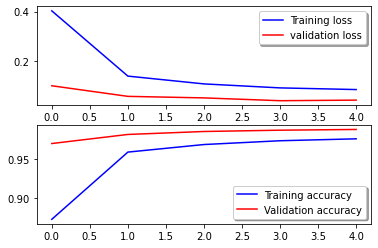

In [19]:
epochs = 5 # Change this to 35 for best results
model = model_2CMDr_2CMDr_FDDr_D()
print("Starting evaluation")
model,history = evaluate_model(model,X_train,Y_train,X_val,Y_val,"model_2CMDr_2CMDr_FDDr_D.best",epochs,64)
plot_results(history)

results = add_result("2CMDr_2CMDr_FDDr_D",history,results,0)
results

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 28, 28, 64)        640       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 28, 28, 64)        36928     
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 28, 28, 64)        36928     
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 28, 28, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 12544)             0   

,CNN Model,Train Accuracy,Test Accuracy
0,2CMDr_2CMDr_FDDr_D,0.976283,0.988333
1,vgg_64_4,0.979463,0.988571


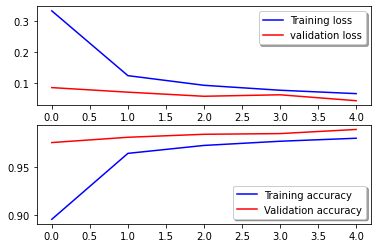

In [20]:
def vgg_model(n_filters,n_conv):
    visible = Input(shape=(28, 28, 1))
    layers= visible
    for _ in range(n_conv):
        layers = Conv2D(n_filters, (3,3), padding='same', activation='relu')(layers)
    #add max pooling layer
    layers = MaxPooling2D((2,2), strides=(2,2))(layers)
    layers = Flatten()(layers)
    output = Dense(10,activation='softmax')(layers)
    model = Model(inputs=visible, outputs=output)
    print(model.summary())
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

model = vgg_model(64,4)
print("Starting evaluation")
model,history = evaluate_model(model,X_train,Y_train,X_val,Y_val,"model_vgg_64_4.best",epochs,64)
plot_results(history)
results = add_result("vgg_64_4",history,results,1)
results

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization_1 (Batch (None, 26, 26, 32)        128       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 24, 24, 32)        9248      
_________________________________________________________________
batch_normalization_2 (Batch (None, 24, 24, 32)        128       
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 24, 24, 32)        9248      
_________________________________________________________________
batch_normalization_3 (Batch (None, 24, 24, 32)        128       
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 12, 12, 32)       

,CNN Model,Train Accuracy,Test Accuracy
0,2CMDr_2CMDr_FDDr_D,0.976283,0.988333
1,vgg_64_4,0.979463,0.988571
2,vgg_batchNormalize,0.971142,0.985476


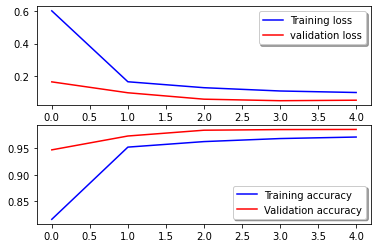

In [21]:
def model_vgg_batchNormalize():
    model = Sequential()

    model.add(Conv2D(32,kernel_size=3,activation='relu',input_shape=(28,28,1)))
    model.add(BatchNormalization())
    model.add(Conv2D(32,kernel_size=3,activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(32,kernel_size=3,activation='relu',padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(32,kernel_size=5,strides=2,padding='same',activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.4))

    model.add(Conv2D(64,kernel_size=3,activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(64,kernel_size=3,activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(64,kernel_size=5,strides=2,padding='same',activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.4))
    
    model.add(BatchNormalization())
    model.add(Conv2D(256,kernel_size=3,activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(256,kernel_size=5,strides=2,padding='same',activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.4))
    
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.4))
    model.add(Dense(10, activation='softmax'))
    print(model.summary())
    
    model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
    return model

model = model_vgg_batchNormalize()
print("Starting evaluation")
model,history = evaluate_model(model,X_train,Y_train,X_val,Y_val,"model_vgg_batchNormalize.best",epochs,64)
plot_results(history)
results = add_result("vgg_batchNormalize",history,results,2)
results

### Inception

![](https://www.jeremyjordan.me/content/images/2018/04/inception-model.png)

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 28, 28, 1)    0                                            
__________________________________________________________________________________________________
conv2d_19 (Conv2D)              (None, 28, 28, 16)   32          input_2[0][0]                    
__________________________________________________________________________________________________
conv2d_21 (Conv2D)              (None, 28, 28, 16)   32          input_2[0][0]                    
__________________________________________________________________________________________________
max_pooling2d_4 (MaxPooling2D)  (None, 28, 28, 1)    0           input_2[0][0]                    
____________________________________________________________________________________________

,CNN Model,Train Accuracy,Test Accuracy
0,2CMDr_2CMDr_FDDr_D,0.976283,0.988333
1,vgg_64_4,0.979463,0.988571
2,vgg_batchNormalize,0.971142,0.985476
3,Inception,0.97305,0.987143


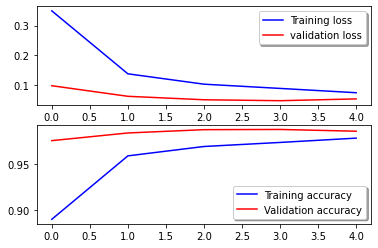

In [22]:
def model_Inception():
    input_img = Input(shape=(28, 28, 1))
    # Layer 1
    layer1_tower_0 = Conv2D(16, (1, 1), padding='same', activation='relu')(input_img)
    layer1_tower_1 = Conv2D(16, (1, 1), padding='same', activation='relu')(input_img)
    layer1_tower_1 = Conv2D(16, (3, 3), padding='same', activation='relu')(layer1_tower_1)
    
    layer1_tower_2 = Conv2D(16, (1, 1), padding='same', activation='relu')(input_img)
    layer1_tower_2 = Conv2D(16, (5, 5), padding='same', activation='relu')(layer1_tower_2)

    layer1_tower_3 = MaxPooling2D((3, 3), strides=(1, 1), padding='same')(input_img)
    layer1_tower_3 = Conv2D(16, (1, 1), padding='same', activation='relu')(layer1_tower_3)

    layer1_output = concatenate([layer1_tower_1, layer1_tower_2, layer1_tower_3, layer1_tower_0], axis=1)

    # Layer 2
    layer2_tower_0 = Conv2D(16, (1, 1), padding='same', activation='relu')(layer1_output)
    layer2_tower_1 = Conv2D(16, (1, 1), padding='same', activation='relu')(layer1_output)
    layer2_tower_1 = Conv2D(16, (3, 3), padding='same', activation='relu')(layer2_tower_1)

    layer2_tower_2 = Conv2D(16, (1, 1), padding='same', activation='relu')(layer1_output)
    layer2_tower_2 = Conv2D(16, (5, 5), padding='same', activation='relu')(layer2_tower_2)

    layer2_tower_3 = MaxPooling2D((3, 3), strides=(1, 1), padding='same')(layer1_output)
    layer2_tower_3 = Conv2D(16, (1, 1), padding='same', activation='relu')(layer2_tower_3)

    layer2_output = concatenate([layer2_tower_1, layer2_tower_2, layer2_tower_3, layer2_tower_0], axis=1)

    # Flatten & Dense
    layer2_output = Flatten()(layer2_output)
    output = Dense(10,activation='softmax')(layer2_output)
    
    inception_Model = Model(inputs=input_img,outputs=output)
    
    print(inception_Model.summary())
    inception_Model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
    return inception_Model

model = model_Inception()
print("Starting evaluation")
model,history = evaluate_model(model,X_train,Y_train,X_val,Y_val,"model_Inception.best",epochs,64)
plot_results(history)
results = add_result("Inception",history,results,3)
results

### XCeption

![](https://cdn-images-1.medium.com/max/1600/1*SRBSbojkg48DTUMcP5VVHg.jpeg)

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 28, 28, 1)    0                                            
__________________________________________________________________________________________________
conv2d_30 (Conv2D)              (None, 14, 14, 32)   320         input_3[0][0]                    
__________________________________________________________________________________________________
batch_normalization_12 (BatchNo (None, 14, 14, 32)   128         conv2d_30[0][0]                  
__________________________________________________________________________________________________
dropout_8 (Dropout)             (None, 14, 14, 32)   0           batch_normalization_12[0][0]     
____________________________________________________________________________________________

Epoch 1/5
 - 25s - loss: 0.9575 - accuracy: 0.7829 - val_loss: 0.3987 - val_accuracy: 0.9164

Epoch 00001: val_accuracy improved from -inf to 0.91643, saving model to model_Xception.best.hdf5
Epoch 2/5
 - 23s - loss: 0.4027 - accuracy: 0.9207 - val_loss: 0.2094 - val_accuracy: 0.9674

Epoch 00002: val_accuracy improved from 0.91643 to 0.96738, saving model to model_Xception.best.hdf5
Epoch 3/5
 - 21s - loss: 0.2937 - accuracy: 0.9423 - val_loss: 0.1471 - val_accuracy: 0.9738

Epoch 00003: val_accuracy improved from 0.96738 to 0.97381, saving model to model_Xception.best.hdf5
Epoch 4/5
 - 22s - loss: 0.2191 - accuracy: 0.9519 - val_loss: 0.1115 - val_accuracy: 0.9733

Epoch 00004: val_accuracy did not improve from 0.97381
Epoch 5/5
 - 23s - loss: 0.1754 - accuracy: 0.9604 - val_loss: 0.0915 - val_accuracy: 0.9774

Epoch 00005: val_accuracy improved from 0.97381 to 0.97738, saving model to model_Xception.best.hdf5


,CNN Model,Train Accuracy,Test Accuracy
0,2CMDr_2CMDr_FDDr_D,0.976283,0.988333
1,vgg_64_4,0.979463,0.988571
2,vgg_batchNormalize,0.971142,0.985476
3,Inception,0.97305,0.987143
4,Xception,0.960436,0.977381


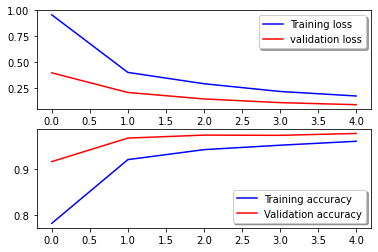

In [23]:
def model_Xception():
    inp = Input(shape = (28, 28, 1))
    x = inp
    x = Conv2D(32, (3, 3), strides = 2, padding = "same", activation = "relu")(x)
    x = BatchNormalization(axis = 3)(x)
    x = Dropout(0.4)(x)
    x = Conv2D(64, (3, 3), strides = 1, padding = "same", activation = "relu")(x)
    x = BatchNormalization(axis = 3)(x)
    x = Dropout(0.4)(x)

    x1 = DepthwiseConv2D((3, 3), (1, 1), padding = "same", activation = "relu")(x)
    x = BatchNormalization(axis = 3)(x)
    x = Dropout(0.4)(x)
    x1 = DepthwiseConv2D((3, 3), (1, 1), padding = "same", activation = "relu")(x1)
    x = BatchNormalization(axis = 3)(x)
    x = Dropout(0.4)(x)
    x1 = MaxPooling2D((2, 2), strides = 1)(x1)

    x = concatenate([x1, Conv2D(64, (2, 2), strides = 1)(x)])

    x1 = Activation("relu")(x)
    x1 = Conv2D(256, (3, 3), strides = 1, padding = "same", activation = "relu")(x1)
    x = BatchNormalization(axis = 3)(x)
    x = Dropout(0.4)(x)
    x1 = DepthwiseConv2D((3, 3), strides = 1, padding = "same", activation = "relu")(x1)
    x = BatchNormalization(axis = 3)(x)
    x = Dropout(0.4)(x)
    x1 = DepthwiseConv2D((3, 3), strides = 1, padding = "same")(x1)
    x = BatchNormalization(axis = 3)(x)
    x = Dropout(0.4)(x)
    x1 = MaxPooling2D((2, 2), strides = 1)(x1)

    x = concatenate([x1, Conv2D(256, (2, 2), strides = 1)(x)])

    x = Activation("relu")(x)
    x = Conv2D(256, (3, 3), strides = 1, padding = "same", activation = "relu")(x)
    x = BatchNormalization(axis = 3)(x)
    x = Dropout(0.4)(x)
    x = Conv2D(128, (3, 3), strides = 1, padding = "same", activation = "relu")(x)
    x = BatchNormalization(axis = 3)(x)
    x = Dropout(0.4)(x)
    x = Flatten()(x)

    x = Dense(10, activation = "softmax")(x)

    xception = Model(inp, x)
    print(xception.summary())
    xception.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
    return xception

model = model_Xception()
print("Starting evaluation")
model,history = evaluate_model(model,X_train,Y_train,X_val,Y_val,"model_Xception.best",epochs,64)
plot_results(history)
results = add_result("Xception",history,results,4)
results

## Select model and predict test data
Select the best model and best weights and use it to predict results.

In [24]:
results

,CNN Model,Train Accuracy,Test Accuracy
0,2CMDr_2CMDr_FDDr_D,0.976283,0.988333
1,vgg_64_4,0.979463,0.988571
2,vgg_batchNormalize,0.971142,0.985476
3,Inception,0.97305,0.987143
4,Xception,0.960436,0.977381


Above results are just for 5 epochs, increasing epochs to 35,40 giving better results.

In [25]:
## predict results
# model = model_2CMDr_2CMDr_FDDr_D()  #99.214%
# model = vgg_model(64,4) #99.476%
model = model_vgg_batchNormalize()  #99.73%
# model = model_Inception()  #99.21%
# model = model_Xception()  #99.57%

model.load_weights("model_vgg_batchNormalize.best.hdf5")

test_data = input_test.values.reshape(-1,28,28,1)
outputs = model.predict(test_data)

# select the index with the maximum probability
outputs = np.argmax(outputs,axis = 1)

outputs = pd.Series(outputs,name="Label")
outputs

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_37 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization_21 (Batc (None, 26, 26, 32)        128       
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 24, 24, 32)        9248      
_________________________________________________________________
batch_normalization_22 (Batc (None, 24, 24, 32)        128       
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 24, 24, 32)        9248      
_________________________________________________________________
batch_normalization_23 (Batc (None, 24, 24, 32)        128       
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 12, 12, 32)       

0        2
1        0
2        9
3        0
4        3
        ..
27995    9
27996    7
27997    3
27998    9
27999    2
Name: Label, Length: 28000, dtype: int64

### Submission

In [26]:
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),outputs],axis = 1)

#submission.to_csv("submision_Inception.csv",index=False)
submission

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9
